<a href="https://colab.research.google.com/github/nadj4/masinsko-ucenje-radovi/blob/main/dijabetes2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

partial paresis       0.432288
sudden weight loss    0.436568
Gender                0.449233
Polydipsia            0.648734
Polyuria              0.665922
class                 1.000000
Name: class, dtype: float64

<Axes: >

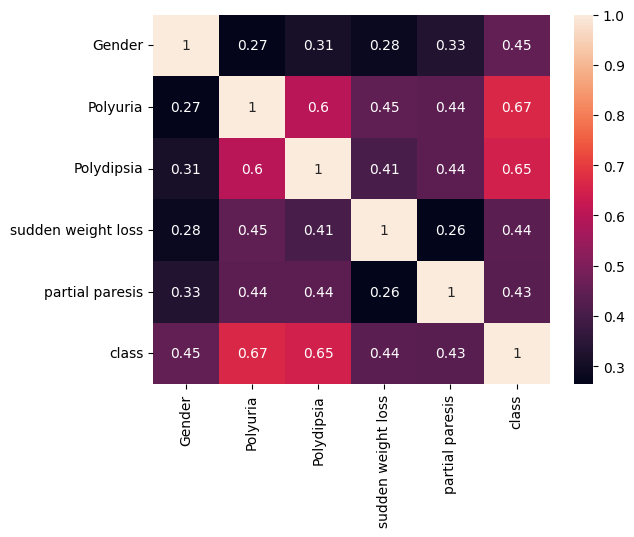

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("diabetes_risk_prediction_dataset.csv")
data.head()

data=data.replace('No', 0)
data=data.replace('Yes', 1)

data=data.replace('Male', 0)
data=data.replace('Female', 1)

data=data.replace('Negative', 0)
data=data.replace('Positive', 1)

data=data.drop(['Itching', 'delayed healing', 'Obesity', 'Age', 'weakness', 'Polyphagia', 'Genital thrush',
                'visual blurring', 'Irritability', 'muscle stiffness', 'Alopecia'], axis='columns')

cor = data.corr()
cor1= data.corr().iloc[-1].sort_values(ascending=True)
display(cor1)

sns.heatmap(cor, annot = True)

In [29]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2)

print(len(train))
print(len(test))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data.drop('class',axis=1))
scaled_features = scaler.transform(data.drop('class',axis=1))

data_new = pd.DataFrame(scaled_features)
data_new.head()

416
104


,0,1,2,3,4
0,-0.765092,-0.992337,1.109847,-0.846269,-0.869918
1,-0.765092,-0.992337,-0.901025,-0.846269,1.149534
2,-0.765092,1.007722,-0.901025,-0.846269,-0.869918
3,-0.765092,-0.992337,-0.901025,1.181657,-0.869918
4,-0.765092,1.007722,1.109847,1.181657,1.149534


In [45]:
from sklearn.model_selection import train_test_split
X = data_new
y = data['class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))




[[33  1]
 [ 4 66]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        34
           1       0.99      0.94      0.96        70

    accuracy                           0.95       104
   macro avg       0.94      0.96      0.95       104
weighted avg       0.95      0.95      0.95       104

